# Handwritten Digit Recognition
Digit recognition system is the working of a machine to train itself for recognizing the digits from different sources like emails, bank cheque, papers, images, etc. and in different real-world scenarios for online handwriting recognition on computer tablets or system. Developing such a system includes a machine to understand and classify the images of handwritten digits as 10 digits (0–9). Handwritten digits from the MNIST database has been one of the most famous databases among the machine learning community for many recent decades.

__Question:__
Use MNIST dataset to create a classifier for all the 10 digits. First implement the classifier by squeezing the image into a vector and then using a MLP. Now, try the same task using a different machine learning classifier such as an SVM to check the gain in performance by using perceptrons as compared to conventional machine learning techniques.


In [1]:
# Importing Libarires 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from sklearn.datasets import load_digits
from sklearn import preprocessing 
from collections import Counter 
from skimage.feature import hog
import warnings
warnings.filterwarnings('ignore')

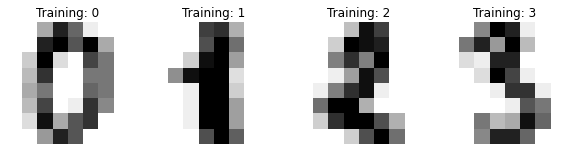

In [2]:
digits =load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [3]:
n_samples = len(digits.images)

In [4]:
data = digits.images.reshape((n_samples,-1))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [6]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [7]:
Model = MLPClassifier(activation='relu', hidden_layer_sizes=(200, 200), alpha = 0.3)
Model.fit(X_train, y_train)

MLPClassifier(alpha=0.3, hidden_layer_sizes=(200, 200))

In [8]:
print("Training Score :: {}\n".format(Model.score(X_train, y_train)))
print("Testing Score :: {}\n".format(Model.score(X_test, y_test)))

Training Score :: 1.0

Testing Score :: 0.946607341490545



In [9]:
predicted = Model.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,plot_confusion_matrix

In [11]:
confusion_matrix(y_test,predicted)

array([[85,  0,  1,  0,  1,  0,  1,  0,  0,  0],
       [ 0, 83,  0,  1,  0,  0,  0,  0,  1,  6],
       [ 0,  0, 85,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 78,  0,  5,  0,  2,  6,  0],
       [ 1,  0,  0,  0, 87,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 87,  1,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 87,  0,  2],
       [ 0,  4,  0,  0,  0,  2,  1,  0, 81,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  1, 88]], dtype=int64)

In [12]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        88
           1       0.94      0.91      0.93        91
           2       0.99      0.99      0.99        86
           3       0.96      0.86      0.91        91
           4       0.99      0.95      0.97        92
           5       0.91      0.96      0.93        91
           6       0.97      0.99      0.98        91
           7       0.98      0.98      0.98        89
           8       0.91      0.92      0.92        88
           9       0.85      0.96      0.90        92

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899



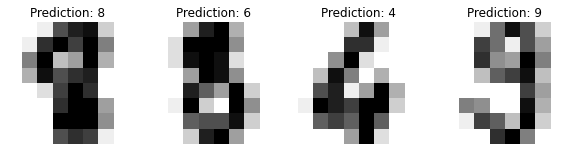

In [13]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Confusion matrix:
[[85  0  1  0  1  0  1  0  0  0]
 [ 0 83  0  1  0  0  0  0  1  6]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 78  0  5  0  2  6  0]
 [ 1  0  0  0 87  0  0  0  0  4]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  0  0 87  0  2]
 [ 0  4  0  0  0  2  1  0 81  0]
 [ 0  0  0  1  0  2  0  0  1 88]]


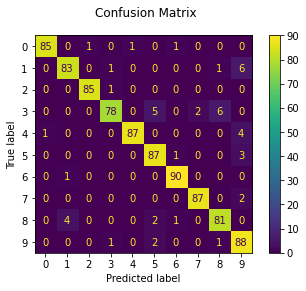

In [14]:
disp = plot_confusion_matrix(Model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [15]:
from sklearn.svm import SVC

In [16]:
clf = SVC(gamma=0.001)

In [17]:
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



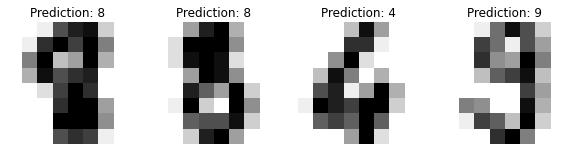

In [19]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf2 = DecisionTreeClassifier()

In [22]:
clf2.fit(X_train,y_train)
pred2 = clf2.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        88
           1       0.81      0.64      0.71        91
           2       0.93      0.73      0.82        86
           3       0.69      0.79      0.73        91
           4       0.81      0.79      0.80        92
           5       0.59      0.76      0.67        91
           6       0.84      0.93      0.89        91
           7       0.88      0.69      0.77        89
           8       0.65      0.67      0.66        88
           9       0.67      0.75      0.71        92

    accuracy                           0.77       899
   macro avg       0.78      0.77      0.77       899
weighted avg       0.78      0.77      0.77       899



In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
clf3 = RandomForestClassifier()
clf3.fit(X_train,y_train)
pred3 = clf3.predict(X_test)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.94      0.90      0.92        91
           2       0.97      0.91      0.94        86
           3       0.92      0.86      0.89        91
           4       0.99      0.92      0.96        92
           5       0.87      0.93      0.90        91
           6       0.98      1.00      0.99        91
           7       0.94      0.99      0.96        89
           8       0.94      0.88      0.91        88
           9       0.84      0.95      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899



In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf4 = LogisticRegression()
clf4.fit(X_train,y_train)
pred4 = clf4.predict(X_test)
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.94      0.90      0.92        91
           2       0.99      0.98      0.98        86
           3       0.94      0.84      0.88        91
           4       0.98      0.91      0.94        92
           5       0.88      0.95      0.91        91
           6       0.91      0.99      0.95        91
           7       0.98      0.96      0.97        89
           8       0.89      0.90      0.89        88
           9       0.84      0.93      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899



In [33]:
def neural_network(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb):
    # Weights are split back to Theta1, Theta2
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, input_layer_size + 1))
    Theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):],
                        (num_labels, hidden_layer_size + 1))
 
    # Forward propagation
    m = X.shape[0]
    one_matrix = np.ones((m, 1))
    X = np.append(one_matrix, X, axis=1)  # Adding bias unit to first layer
    a1 = X
    z2 = np.dot(X, Theta1.transpose())
    a2 = 1 / (1 + np.exp(-z2))  # Activation for second layer
    one_matrix = np.ones((m, 1))
    a2 = np.append(one_matrix, a2, axis=1)  # Adding bias unit to hidden layer
    z3 = np.dot(a2, Theta2.transpose())
    a3 = 1 / (1 + np.exp(-z3))  # Activation for third layer
 
    # Changing the y labels into vectors of boolean values.
    # For each label between 0 and 9, there will be a vector of length 10
    # where the ith element will be 1 if the label equals i
    y_vect = np.zeros((m, 10))
    for i in range(m):
        y_vect[i, int(y[i])] = 1
 
    # Calculating cost function
    J = (1 / m) * (np.sum(np.sum(-y_vect * np.log(a3) - (1 - y_vect) * np.log(1 - a3)))) + (lamb / (2 * m)) * (
                sum(sum(pow(Theta1[:, 1:], 2))) + sum(sum(pow(Theta2[:, 1:], 2))))
 
    # backprop
    Delta3 = a3 - y_vect
    Delta2 = np.dot(Delta3, Theta2) * a2 * (1 - a2)
    Delta2 = Delta2[:, 1:]
 
    # gradient
    Theta1[:, 0] = 0
    Theta1_grad = (1 / m) * np.dot(Delta2.transpose(), a1) + (lamb / m) * Theta1
    Theta2[:, 0] = 0
    Theta2_grad = (1 / m) * np.dot(Delta3.transpose(), a2) + (lamb / m) * Theta2
    grad = np.concatenate((Theta1_grad.flatten(), Theta2_grad.flatten()))
 
    return J, grad

In [34]:
def initialise(a, b):
    epsilon = 0.15
    c = np.random.rand(a, b + 1) * (
      # Randomly initialises values of thetas between [-epsilon, +epsilon]
      2 * epsilon) - epsilon 
    return c

In [35]:
def predict(Theta1, Theta2, X):
    m = X.shape[0]
    one_matrix = np.ones((m, 1))
    X = np.append(one_matrix, X, axis=1)  # Adding bias unit to first layer
    z2 = np.dot(X, Theta1.transpose())
    a2 = 1 / (1 + np.exp(-z2))  # Activation for second layer
    one_matrix = np.ones((m, 1))
    a2 = np.append(one_matrix, a2, axis=1)  # Adding bias unit to hidden layer
    z3 = np.dot(a2, Theta2.transpose())
    a3 = 1 / (1 + np.exp(-z3))  # Activation for third layer
    p = (np.argmax(a3, axis=1))  # Predicting the class on the basis of max value of hypothesis
    return p

In [37]:
from scipy.io import loadmat
from scipy.optimize import minimize

In [42]:

#from Model import neural_network
#from RandInitialize import initialise
#from Prediction import predict


# Loading mat file
data = loadmat('mnist-original.mat')

# Extracting features from mat file
X = data['data']
X = X.transpose()

# Normalizing the data
X = X / 255

# Extracting labels from mat file
y = data['label']
y = y.flatten()

# Splitting data into training set with 60,000 examples
X_train = X[:60000, :]
y_train = y[:60000]

# Splitting data into testing set with 10,000 examples
X_test = X[60000:, :]
y_test = y[60000:]

m = X.shape[0]
input_layer_size = 784 # Images are of (28 X 28) px so there will be 784 features
hidden_layer_size = 100
num_labels = 10 # There are 10 classes [0, 9]

# Randomly initialising Thetas
initial_Theta1 = initialise(hidden_layer_size, input_layer_size)
initial_Theta2 = initialise(num_labels, hidden_layer_size)

# Unrolling parameters into a single column vector
initial_nn_params = np.concatenate((initial_Theta1.flatten(), initial_Theta2.flatten()))
maxiter = 100
lambda_reg = 0.1 # To avoid overfitting
myargs = (input_layer_size, hidden_layer_size, num_labels, X_train, y_train, lambda_reg)

# Calling minimize function to minimize cost function and to train weights
results = minimize(neural_network, x0=initial_nn_params, args=myargs,
		options={'disp': True, 'maxiter': maxiter}, method="L-BFGS-B", jac=True)

nn_params = results["x"] # Trained Theta is extracted

# Weights are split back to Theta1, Theta2
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], (
							hidden_layer_size, input_layer_size + 1)) # shape = (100, 785)
Theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):],
					(num_labels, hidden_layer_size + 1)) # shape = (10, 101)

# Checking test set accuracy of our model
pred = predict(Theta1, Theta2, X_test)
print('Test Set Accuracy: {:f}'.format((np.mean(pred == y_test) * 100)))

# Checking train set accuracy of our model
pred = predict(Theta1, Theta2, X_train)
print('Training Set Accuracy: {:f}'.format((np.mean(pred == y_train) * 100)))

# Evaluating precision of our model
true_positive = 0
for i in range(len(pred)):
	if pred[i] == y_train[i]:
		true_positive += 1
false_positive = len(y_train) - true_positive
print('Precision =', true_positive/(true_positive + false_positive))

# Saving Thetas in .txt file
np.savetxt('Theta1.txt', Theta1, delimiter=' ')
np.savetxt('Theta2.txt', Theta2, delimiter=' ')


Test Set Accuracy: 96.420000
Training Set Accuracy: 97.460000
Precision = 0.9746
